In [223]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = [10, 10]

pd.set_option('display.max_columns', None)  

In [354]:
#400k current restuarant menu items
df = pd.read_csv('US_restaurants.csv')
veg_menus = df['menus'].dropna()

d = []
for x in veg_menus:
    d.append(x.split('{'))
        
flat_list = [item for sublist in d for item in sublist]

bigger_list = []
for x in flat_list:
    a = re.sub('[-":\[\]\',./}]', ' ',str(x)).lower()
    a = re.sub('[0-9]', ' ',a)
    for r in (('categories', ''), ('restaurant', ''),('descriptions', ''),('name', ''),('usd', ''),('prices', ''),('\\\\', '')):
        a = a.replace(*r)
    bigger_list.append(re.sub("\s+", " " ,a).strip())
    
food = input('Search:')
results = [i for i in bigger_list1 if food in i]

In [35]:
#422k dishes from reciepe book
df = pd.read_csv('Dish.csv'); len(df)
food = input('Search:')
results = [i for i in df['name'].str.lower() if food in i]; len(results)

Search:pork chop


831

In [70]:
#40k classic restaurant menus items
df = pd.read_json('train.json'); len(df)
word=input('search:')
results = [i for i in df['ingredients'] if word in i]; len(results)

search:pork chops


52

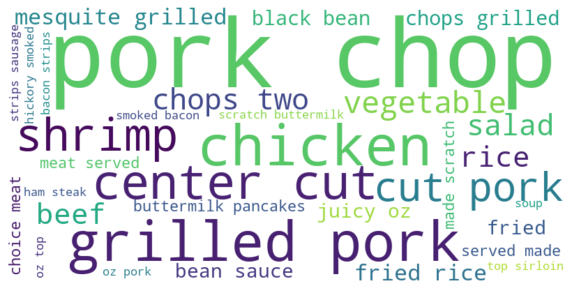

In [357]:
join_em = [''.join(e) for e in results]
join_em = ' '.join(join_em)

wordcloud = WordCloud(
                      background_color='white',
                      max_words=33,
                      max_font_size=135, 
                      random_state=42,
                      include_numbers=True,
                      width=800,
                      height=400
                      ).generate(join_em)

fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()